# Solution of Programming Exercise 1 - Group N

<p>Authors: Pablo Gomez and Jairo R. Mejia</p>

## Problem 1 (10 pts)

### Problem 1.a (5 pts)

A fair coin is tossed *n* times. Simulate a Bernoulli random variable with success probability *p = 0.5*. At each
iteration *k*, compute a sample average of all *k* sampled elements. Afterwards, produce a plot of the average
vs iterations. According to the law of large numbers, the sample average approaches the mathematical expectation, as $n \to \infty$. Take n = $10^3$

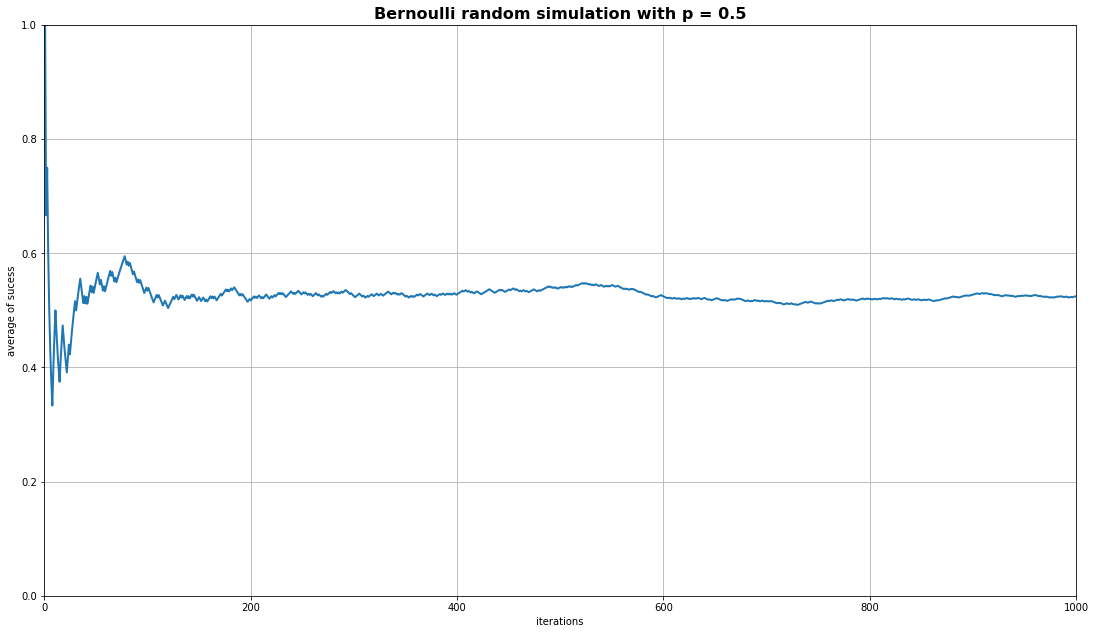

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, binom

n = 1000
p = 0.5

iterations = np.linspace(0, n, n)
X = bernoulli(p)
samples = X.rvs(n)
mean = np.zeros(n, dtype=float)

for i in range(n):
    mean[i] = np.mean(samples[:i+1])

# plot
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(iterations, mean, linewidth=2.0)
ax.set(xlim=(0, n), ylim=(0, 1))

plt.title("Bernoulli random simulation with p = 0.5", fontweight="bold", size=16)
plt.xlabel('iterations')
plt.ylabel('average of sucess') 

plt.grid()
plt.show()

### Problem 1.b (5 pts)

Make $n$ following experiments. At $k$-th experiment ($k = 1$, . . . , $n$), draw $k$ elements from a Bernoulli distribution $m$ times, compute an average of $k$ elements for each time, and save the result into a corresponding row of an $n-by-m$ matrix (thus, you will have $m$ averages in a $k$-th row). Afterwards, plot the results as the average vs the sample size using Matplotlib’s plot and errorbar functions. According to the law of large numbers, the deviation of the average should decrease with the increase of the sample size. Take $n = 10^3$, $m = 10$.

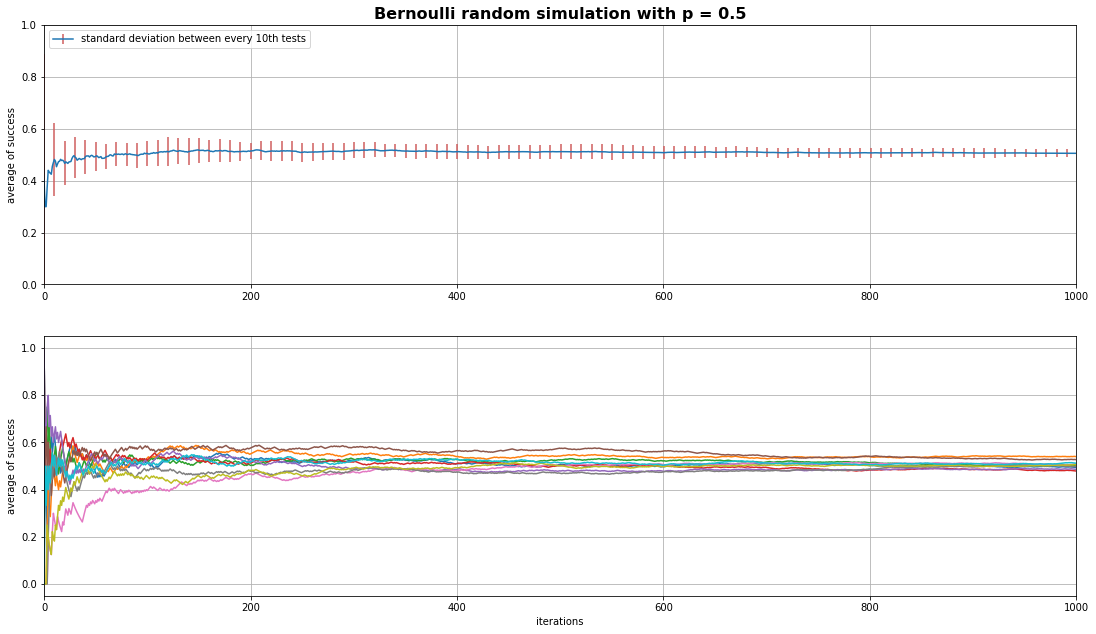

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, binom

p = 0.5
n = 1000
m = 10

iterations = np.linspace(0, n, n)
X = bernoulli(p)
samples = np.zeros((n, m), dtype=int)
mean = np.zeros((n,m), dtype=float)

for i in range(m):
    samplesByRow = X.rvs(n)
    for j in range(n):
        samples[j][i] = samplesByRow[j]
        currRow = samples[:, [i]]
        mean[j][i] = np.mean(currRow[:j+1])
        
meanAvg = np.array([ np.mean(mean[i]) for i in range(n) ])
yerr = np.array([ np.std(mean[i]) if (i % 10 == 0) else 0 for i in range(n) ])

# plot
fig, ax = plt.subplots(2, 1)
fig.set_size_inches(18.5, 10.5, forward=True)
plt.subplot(211)
plt.errorbar(iterations, meanAvg, yerr=yerr, ecolor = '#CF5C5C', 
    label="standard deviation between every 10th tests")
plt.legend(loc="upper left")


ax[0].set(xlim=(0, n), ylim=(0, 1))
plt.title("Bernoulli random simulation with p = 0.5", fontweight="bold", size=16)
plt.ylabel('average of success') 
plt.grid()

plt.subplot(212, sharex = ax[0])
for i in range(m):
    plt.plot(iterations, mean[:, [i]], linewidth=1.5)

ax[1].set(xlim=(0, n), ylim=(0, 1))
plt.xlabel('iterations')
plt.ylabel('average of success') 

plt.grid()
plt.show()

## Problem 2 (10 pts)

### Problem 2.a (5pts)

The sum of $n$ independent Bernoulli random variables with success probability $p$ has a binomial distribution with parameters $n$, $p$. Conduct the following procedure $m$ times. Use the program from Problem 1 a., compute the number of successes for $n$ tosses, and save this number into a corresponding row of an $m-by-1$ vector. After the procedure is done, draw a binomially-distributed random variable $m$ times with parameters
$n$, $p$, and save it into another $m-by-1$ vector. For both vectors, plot the resulting probability distributions with the help of a histogram and compute the mean-square error of the difference. Use the following parameter values: $n = 10^3$ , $p = 0.3$, $m = {10^3 , 10^4 , 10^5}$.

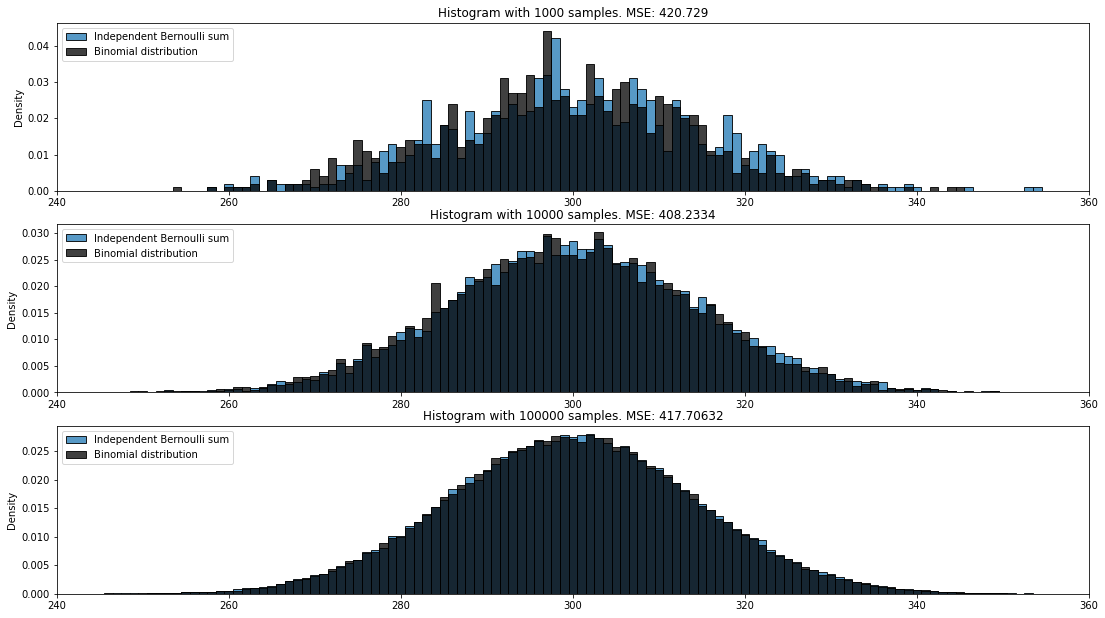

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, binom
import seaborn as sns

# declare variables
n = 1000
m = np.array([1000, 10000, 100000])
p = 0.3
mse = np.zeros(3)

X = bernoulli(p)

# Set a Subblot of three position for the amount of tests
fig, ax = plt.subplots(3,1)
ax[0].set(xlim=(240, 360))
fig.set_size_inches(18.5, 10.5, forward=True)
fig_num = 311

for i in range(np.size(m)):
    # n independent bernoulli RV m times
    X_samples = [X.rvs(n) for j in range(m[i])]
    Y_samples = np.sum(X_samples, axis=1)
    # Binomially distributed RV m times
    Z_samples = binom.rvs(n, p, size=m[i])
    # Compute the mean-square error of diference
    mse[i] = np.square(np.subtract(Z_samples, Y_samples)).mean()
    
    # Create the histogram to measure difference between each other
    plt.subplot(fig_num + i, sharex = ax[0])
    plt.title('Histogram with ' + str(m[i]) + ' samples. MSE: ' + str(mse[i]))
    sns.histplot(Y_samples, stat="density", discrete=True, label='Independent Bernoulli sum')
    sns.histplot(Z_samples, stat="density", color='black', discrete=True, label='Binomial distribution')
    plt.legend(loc="upper left")
    
plt.show()

### Problem 2.b (5 pts)

According to the Poisson limit theorem, as $n → ∞$ and and $p → 0$, the Binomial($n$, $p$) distribution approaches Poisson($np$) distribution. Assume $n = 10^3$ , $p = {10^{−1} , 10^{−2} , 10^{−3} }$, $m = 10^5$ and modify the previous program in order to compare Binomial and Poisson distributions.

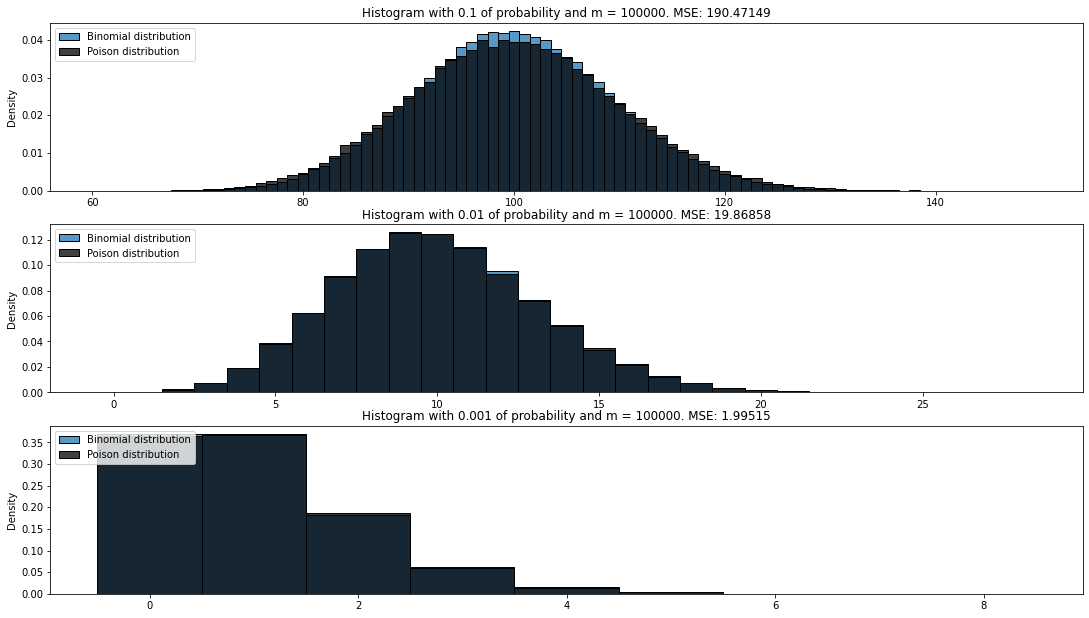

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, binom, poisson
import seaborn as sns

n = 1000
p = np.array([1/10, 1/100, 1/1000])
m = 100000

# Set a Subblot of three position for the amount of tests
fig, ax = plt.subplots(3,1)
fig.set_size_inches(18.5, 10.5, forward = True)
fig_num = 311

for i in range(np.size(p)):
    # Binomially distributed RV m times
    binom_s = binom.rvs(n, p[i], size = m)
    # Poisson distributed RV m times
    poisson_s = poisson.rvs(n * p[i], size = m)
    # Compute the mean-square error of diference
    mse[i] = np.square(np.subtract(binom_s, poisson_s)).mean()
    
    # Create the histogram to measure difference between each other
    plt.subplot(fig_num + i)
    plt.title('Histogram with ' + str(p[i]) + ' of probability and m = 100000. MSE: ' + str(mse[i]))
    sns.histplot(binom_s, stat="density", discrete=True, label='Binomial distribution')
    sns.histplot(poisson_s, stat="density", color='black', discrete=True, label='Poison distribution')
    plt.legend(loc="upper left")
    
plt.show()